episodic_only
- mean 44.56
- std 1.85

semantic_only
- mean 55.72
- std 1.61

random
- mean 37.64 
- std 2.16

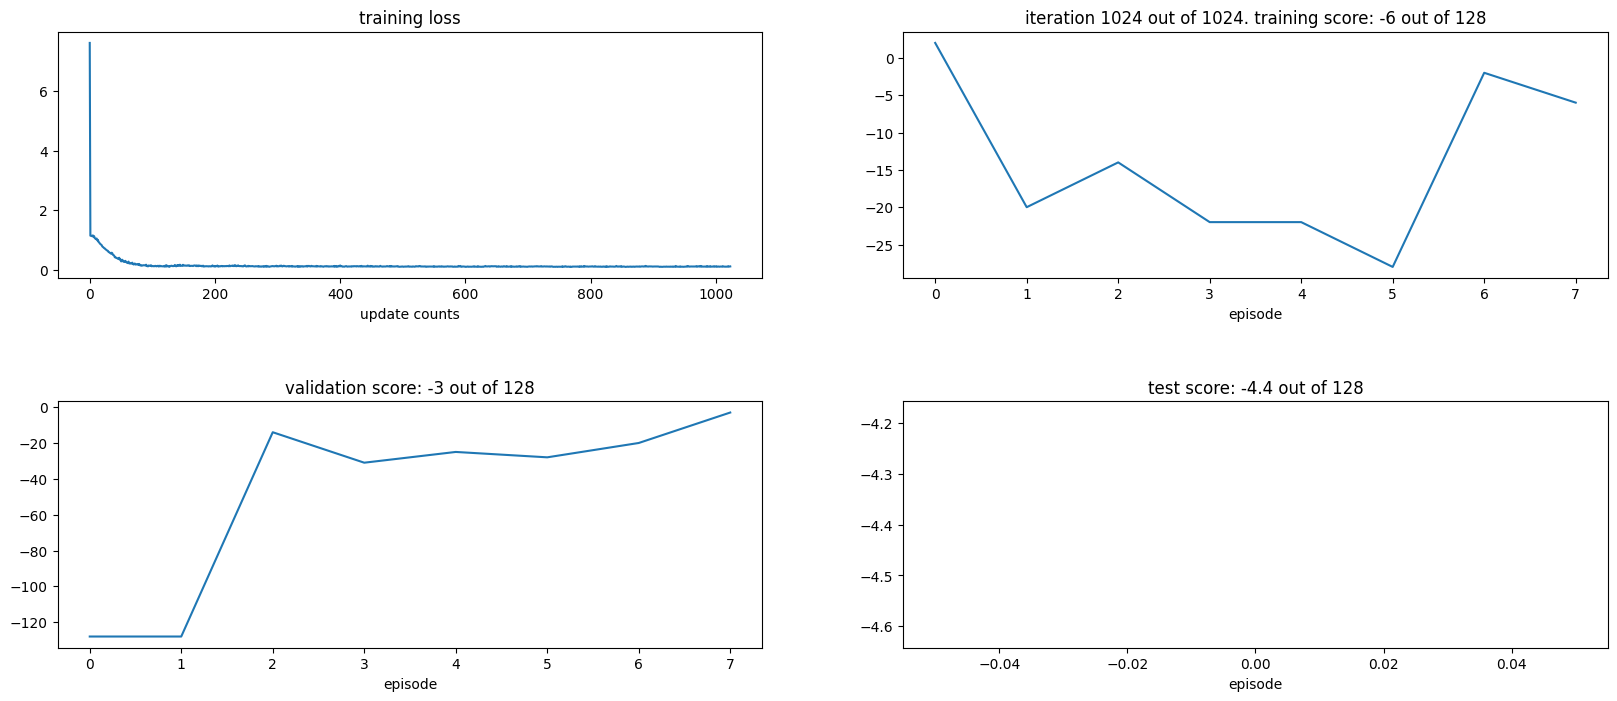

In [1]:
import logging

logger = logging.getLogger()
logger.disabled = True

from agent import DQNAgent

# parameters
all_params = {
    "env_str": "room_env:RoomEnv-v1",
    "gamma": 0.65,
    "capacity": {"episodic": 16, "semantic": 16, "short": 1},
    "nn_params": {
        "hidden_size": 64,
        "num_layers": 2,
        "n_actions": 3,
        "embedding_dim": 32,
        "include_human": "sum",
    },
    "num_iterations": 128 * 8,
    "replay_buffer_size": 128 * 4,
    "batch_size": 128,
    "target_update_rate": 10,
    "pretrain_semantic": False,
    "run_validation": True,
    "run_test": True,
    "num_samples_for_results": 10,
    "train_seed": 5,
    "plotting_interval": 10,
    "device": "cpu",
    "test_seed": 0,
    # PER parameters
    "alpha": 0.2,
    "beta": 0.6,
    "prior_eps": 1e-6,
    # Categorical DQN parameters
    "v_min": 0.0,
    "v_max": 200.0,
    "atom_size": 51,
    # N-step Learning
    "n_step": 3,
}

agent = DQNAgent(**all_params)
agent.train()


In [ ]:
import logging

logger = logging.getLogger()
logger.disabled = True

from agent import HandcraftedAgent

for policy in ["random", "episodic_only", "semantic_only"]:
    for test_seed in [0, 1, 2, 3, 4]:
        all_params = {
            "env_str": "room_env:RoomEnv-v1",
            "policy": policy,
            "num_samples_for_results": 10,
            "test_seed": test_seed,
        }
        if policy == "random":
            all_params["capacity"] = {"episodic": 16, "semantic": 16, "short": 1}
        elif policy == "episodic_only":
            all_params["capacity"] = {"episodic": 32, "semantic": 0, "short": 1}
        else:
            all_params["capacity"] = {"episodic": 0, "semantic": 32, "short": 1}

        all_params["test_seed"] = test_seed
        agent = HandcraftedAgent(**all_params)
        agent.test()

In [ ]:
from glob import glob
import yaml
import numpy as np

results = glob("./training_results/refactoring/episodic_only_agent/*/results.yaml")
scores = []
for file in results:
    with open(file, "r") as f:
        results = yaml.load(f, Loader=yaml.FullLoader)

    scores.append(results["test_score"]["mean"])
print(np.mean(scores), np.std(scores))


In [ ]:
from glob import glob
import yaml
import numpy as np

results = glob("./training_results/refactoring/semantic_only_agent/*/results.yaml")
scores = []
for file in results:
    with open(file, "r") as f:
        results = yaml.load(f, Loader=yaml.FullLoader)

    scores.append(results["test_score"]["mean"])
print(np.mean(scores), np.std(scores))


In [ ]:
from glob import glob
import yaml
import numpy as np

results = glob("./training_results/refactoring/random_agent/*/results.yaml")
scores = []
for file in results:
    with open(file, "r") as f:
        results = yaml.load(f, Loader=yaml.FullLoader)

    scores.append(results["test_score"]["mean"])
print(np.mean(scores), np.std(scores))


In [ ]:
# heights: 50.4, stds: 8.429
# heights: 58.0, stds: 9.381
# heights: 33.8, stds: 9.569
# heights: 89.32000122070312, stds: 4.021143669546528
# heights: 110.71999969482422, stds: 3.5181795198362273